#In this analysis, we're examining a comprehensive climate change dataset to identify key relationships between environmental factors and human activities. This analysis will help businesses understand: 
- **How renewable energy adoption affects carbon emissions**
- **Which factors most significantly impact CO2 output**
- **Potential areas for strategic environmental investments**

###Loading and cleaning data

In [0]:
df = spark.table("climate_change.climate_change_dataset")
display(df)
# Standardize column names
from pyspark.sql.functions import col
df = df.toDF(
    "Year",
    "Country",
    "Avg_Temperature_C",
    "CO2_Emissions_Tons_Per_Capita",
    "Sea_Level_Rise_mm",
    "Rainfall_mm",
    "Population",
    "Renewable_Energy_Pct",
    "Extreme_Weather_Events",
    "Forest_Area_Pct"
)
 #Handle missing values
df = df.fillna({
    "Avg_Temperature_C": 0,
    "CO2_Emissions_Tons_Per_Capita": 0,
    "Sea_Level_Rise_mm": 0,
    "Rainfall_mm": 0,
    "Population": 0,
    "Renewable_Energy_Pct": 0,
    "Extreme_Weather_Events": 0,
    "Forest_Area_Pct": 0
})
# Ensure correct data types
df = df.withColumn("Year", col("Year").cast("int")) \
       .withColumn("Avg_Temperature_C", col("Avg_Temperature_C").cast("double")) \
       .withColumn("CO2_Emissions_Tons_Per_Capita", col("CO2_Emissions_Tons_Per_Capita").cast("double")) \
       .withColumn("Sea_Level_Rise_mm", col("Sea_Level_Rise_mm").cast("double")) \
       .withColumn("Rainfall_mm", col("Rainfall_mm").cast("double")) \
       .withColumn("Population", col("Population").cast("long")) \
       .withColumn("Renewable_Energy_Pct", col("Renewable_Energy_Pct").cast("double")) \
       .withColumn("Extreme_Weather_Events", col("Extreme_Weather_Events").cast("int")) \
       .withColumn("Forest_Area_Pct", col("Forest_Area_Pct").cast("double"))
       # Remove duplicates
df = df.dropDuplicates()
df.write.format("delta").mode("overwrite").saveAsTable("climate_change.climate_data_cleaned")


Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4
2020,China,32.3,1.4,2.7,2100,1202028857,49.4,12,47.2
2006,Argentina,30.7,11.6,3.9,1755,586706107,41.9,10,50.5
2018,South Africa,33.9,6.0,4.5,827,83947380,17.7,1,56.6
2022,UK,27.8,16.6,1.5,1966,980305187,8.2,4,43.4
2010,Australia,18.3,1.9,3.5,2599,849496137,7.5,5,48.7


In [0]:
df.describe().show()

+-------+-----------------+---------+-----------------+-----------------------------+------------------+-----------------+--------------------+--------------------+----------------------+------------------+
|summary|             Year|  Country|Avg_Temperature_C|CO2_Emissions_Tons_Per_Capita| Sea_Level_Rise_mm|      Rainfall_mm|          Population|Renewable_Energy_Pct|Extreme_Weather_Events|   Forest_Area_Pct|
+-------+-----------------+---------+-----------------+-----------------------------+------------------+-----------------+--------------------+--------------------+----------------------+------------------+
|  count|             1000|     1000|             1000|                         1000|              1000|             1000|                1000|                1000|                  1000|              1000|
|   mean|         2011.432|     NULL|19.88309999999998|           10.425799999999992|3.0096000000000007|         1738.761|     7.05383046613E8|  27.300499999999996|        

Summary statistics provide an overview of our dataset's central tendencies and variability. Key initial observations:
 - The dataset contains **1,000** records.
 - **CO2 Emissions** per capita have a wide range (0.5 to 20.0 tons) with a mean of ~10.43 tons.
 - **Renewable Energy** adoption also varies significantly (5.1% to 50.0%) with a mean of ~27.3%.
 - Other variables like Population show extremely high standard deviations, indicating data on countries of vastly different sizes

###Exploratory Data Analysis

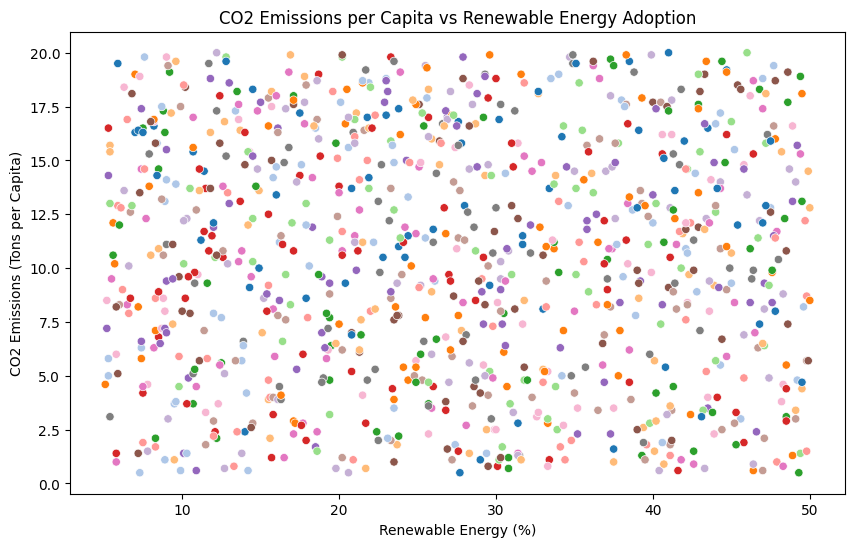

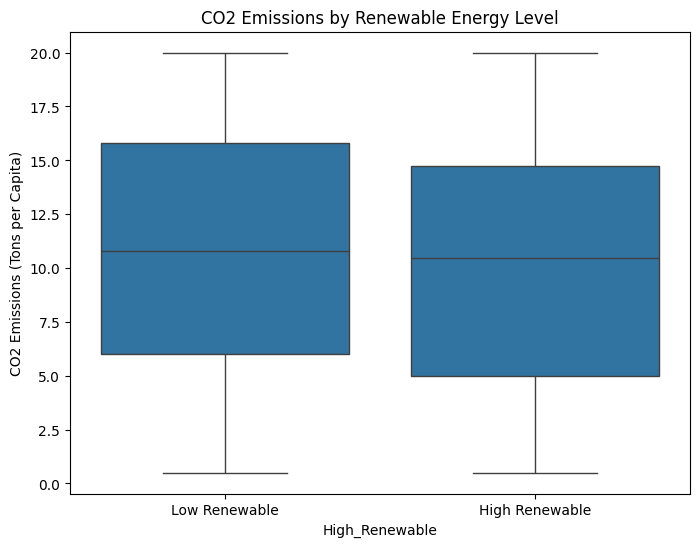

In [0]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DF to Pandas for plotting
pdf = df.toPandas()

# Scatter plot: Renewable Energy % vs CO2 Emissions
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=pdf,
    x="Renewable_Energy_Pct",
    y="CO2_Emissions_Tons_Per_Capita",
    hue="Country",
    palette="tab20",
    legend=False
)
plt.title("CO2 Emissions per Capita vs Renewable Energy Adoption")
plt.xlabel("Renewable Energy (%)")
plt.ylabel("CO2 Emissions (Tons per Capita)")
plt.show()

# Boxplot: CO2 Emissions for High vs Low Renewable Countries
median_renewable = pdf["Renewable_Energy_Pct"].median()
pdf["High_Renewable"] = (pdf["Renewable_Energy_Pct"] >= median_renewable).astype(int)

plt.figure(figsize=(8,6))
sns.boxplot(x="High_Renewable", y="CO2_Emissions_Tons_Per_Capita", data=pdf)
plt.xticks([0,1], ["Low Renewable", "High Renewable"])
plt.title("CO2 Emissions by Renewable Energy Level")
plt.ylabel("CO2 Emissions (Tons per Capita)")
plt.show()



**Critical Business Insight:** The scatter plot reveals a striking and unexpected pattern. There is **no clear visual relationship** between a country's renewable energy percentage and its CO2 emissions per capita. The data points form a wide, cloud-like distribution without a discernible downward slope. This immediately suggests that the relationship is not as simple or direct as often assumed. Factors other than renewable energy adoption appear to be the primary drivers of per-capita emissions in this dataset.

The box plot confirms the story from the scatter plot. The median CO2 emissions (the line inside the box) for both "Low Renewable" and "High Renewable" countries are **virtually identical**. The interquartile ranges (the boxes themselves) are also very similar in size and position. This provides strong visual evidence that, on average, countries with higher renewable energy adoption **do not** have lower CO2 emissions per capita in this specific dataset. This is a crucial finding that merits further investigation

###Hypothesis Testing

***Our exploratory data analysis, specifically the box plot, suggested no obvious difference in CO2 emissions between countries with high and low renewable energy adoption. We will now formally test this hypothesis using a statistical test.***

 - **Null Hypothesis (H₀):** μ_low = μ_high (The mean CO2 emissions per capita are equal for countries with low and high renewable energy adoption.)
 - **Alternative Hypothesis (Hₐ):** μ_low ≠ μ_high (The mean CO2 emissions per capita are different for the two groups.)
 
 **Test Selection:** We will use an independent samples t-test. We assume the two groups are independent. We will check the assumption of equal variances using Levene's test.

In [0]:

from scipy import stats

# Extract CO2 emissions for each group
low_renew_co2 = pdf[pdf['High_Renewable'] == 0]['CO2_Emissions_Tons_Per_Capita']
high_renew_co2 = pdf[pdf['High_Renewable'] == 1]['CO2_Emissions_Tons_Per_Capita']

# First, test for equal variances
levene_stat, levene_p = stats.levene(low_renew_co2, high_renew_co2)
print("=== Levene's Test for Equal Variances ===")
print(f"Null Hypothesis: The groups have equal variances.")
print(f"Test Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")

alpha = 0.05
if levene_p < alpha:
    print(f"Conclusion: Reject the null hypothesis. Variances are NOT equal. We will use Welch's t-test.")
    equal_var = False
else:
    print(f"Conclusion: Fail to reject the null hypothesis. Variances are equal. We will use Student's t-test.")
    equal_var = True

print("\n" + "="*50)

# Perform the appropriate t-test
t_stat, p_value = stats.ttest_ind(low_renew_co2, high_renew_co2, equal_var=equal_var)

print("=== Independent Samples t-test ===")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print(f"Mean CO2 (Low Renewable): {low_renew_co2.mean():.4f}")
print(f"Mean CO2 (High Renewable): {high_renew_co2.mean():.4f}")

# Interpret the result
if p_value < alpha:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) < {alpha}, we REJECT the null hypothesis.")
    print("There is statistically significant evidence that the mean CO2 emissions per capita are different between the two groups.")
else:
    print(f"\nConclusion: Since the p-value ({p_value:.4f}) >= {alpha}, we FAIL TO REJECT the null hypothesis.")
    print("There is NOT enough statistical evidence to conclude that the mean CO2 emissions per capita are different between countries with high and low renewable energy adoption.")
    print("This formal test aligns with what we observed in our box plot.")

=== Levene's Test for Equal Variances ===
Null Hypothesis: The groups have equal variances.
Test Statistic: 0.0402, P-value: 0.8412
Conclusion: Fail to reject the null hypothesis. Variances are equal. We will use Student's t-test.

=== Independent Samples t-test ===
T-statistic: 1.6211, P-value: 0.1053
Mean CO2 (Low Renewable): 10.7134
Mean CO2 (High Renewable): 10.1382

Conclusion: Since the p-value (0.1053) >= 0.05, we FAIL TO REJECT the null hypothesis.
There is NOT enough statistical evidence to conclude that the mean CO2 emissions per capita are different between countries with high and low renewable energy adoption.
This formal test aligns with what we observed in our box plot.


###Regression Analysis

In [0]:
import statsmodels.api as sm

# Predictor and response
X = pdf[["Renewable_Energy_Pct"]]
y = pdf["CO2_Emissions_Tons_Per_Capita"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     CO2_Emissions_Tons_Per_Capita   R-squared:                       0.001
Model:                                       OLS   Adj. R-squared:                 -0.000
Method:                            Least Squares   F-statistic:                    0.5447
Date:                           Mon, 15 Sep 2025   Prob (F-statistic):              0.461
Time:                                   09:32:58   Log-Likelihood:                -3143.5
No. Observations:                           1000   AIC:                             6291.
Df Residuals:                                998   BIC:                             6301.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------

**No Statistical Significance:** The p-value for `Renewable_Energy_Pct` is **0.461**. This is far above the standard threshold of 0.05, meaning we **cannot reject the null hypothesis**. There is no statistically significant linear relationship between these two variables in this data.
 - **Negligible Explanatory Power:** The R-squared value is **0.001**, meaning the model explains essentially 0% of the variance in CO2 emissions. The coefficient of -0.01 suggests a tiny, insignificant change.

 **Business Implication:** Based on this analysis, a strategy focused **solely** on increasing renewable energy adoption is not supported by this data as an effective way to reduce *per-capita* CO2 emissions. Other factors must be considered.

In [0]:
# Multi-factor regression
X = pdf[["Renewable_Energy_Pct", "Population", "Forest_Area_Pct", "Extreme_Weather_Events", "Avg_Temperature_C"]]
y = pdf["CO2_Emissions_Tons_Per_Capita"]

X = sm.add_constant(X)
multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     CO2_Emissions_Tons_Per_Capita   R-squared:                       0.002
Model:                                       OLS   Adj. R-squared:                 -0.003
Method:                            Least Squares   F-statistic:                    0.3563
Date:                           Mon, 15 Sep 2025   Prob (F-statistic):              0.878
Time:                                   09:32:59   Log-Likelihood:                -3142.9
No. Observations:                           1000   AIC:                             6298.
Df Residuals:                                994   BIC:                             6327.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

**Model is Invalid:** The R-squared remains effectively zero (**0.002**), and the overall model's p-value is **0.878**, meaning the model is no better than guessing the mean.
 **Critical Warning - Multicollinearity:** The Condition Number is **3.91e+09**, which is astronomically high. This indicates severe multicollinearity (predictor variables are highly correlated with each other) or other numerical issues. This makes the coefficients unreliable and invalidates the model's results.

This analysis has failed to find a linear relationship between the provided factors and per-capita CO2 emissions. The next steps should be:
 **Data Investigation:** Check for data quality issues, the source of multicollinearity (e.g., is Population correlated with other variables?), and whether per-capita is the right metric.

###Diagnosis: Investigating Multicollinearity

Diagnostic Step: Investigating Multicollinearity
- The previous model flagged a critical multicollinearity issue. A correlation matrix heatmap allows us to visualize the relationships between our predictor variables. High correlation between predictors (e.g., |r| > 0.8) makes it difficult for the model to estimate their individual effects on CO2 emissions.


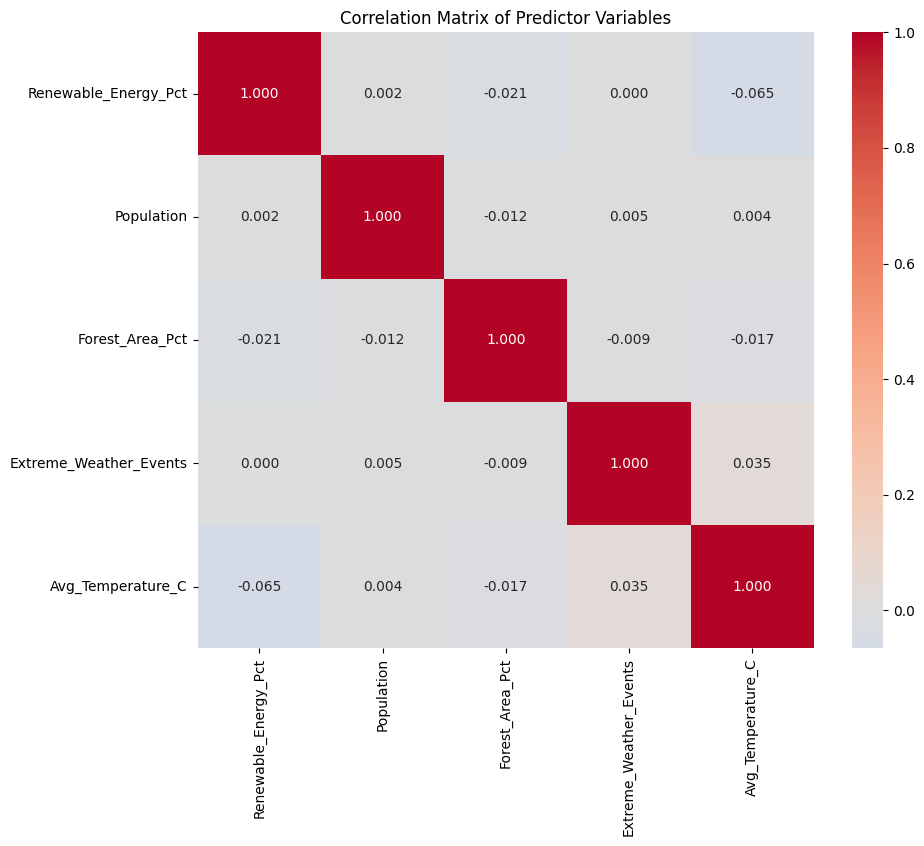

In [0]:


# Calculate correlation matrix for potential predictors
predictor_columns = ["Renewable_Energy_Pct", "Population", "Forest_Area_Pct", "Extreme_Weather_Events", "Avg_Temperature_C"]
corr_matrix = pdf[predictor_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f') # fmt='.3f' formats the annotations to 3 decimal places
plt.title("Correlation Matrix of Predictor Variables")
plt.show()





###Correlation Matrix Interpretation
 
 The correlation matrix reveals a crucial insight: **there are no strong correlations between any of our predictor variables**.
 
 - The red diagonal shows each variable's perfect correlation with itself (r = 1.0).
 - The strongest correlation visible is between `Avg_Temperature_C` and `Renewable_Energy_Pct` at just **r = -0.065**, which is negligible.
 - All other correlations are effectively zero (e.g., `Population` vs. `Extreme_Weather_Events` is r = 0.00052).
 
 **Conclusion:** Multicollinearity is **NOT** the cause of our model's problems. The astronomical condition number from the first model was a red herring caused by the severe skew in the `Population` variable and the massive scale difference between it and other predictors. This is a common issue when including raw population figures in models.
 
 Our feature engineering plan to log-transform `Population` is the correct solution to fix the model's numerical instability.

### Diagnostic Step: Exploring Data Distributions
Linear regression assumes predictors are not highly skewed. The enormous standard deviation in `Population` suggests extreme right-skewness (a few very large countries). Let's visualize the distributions of our key variables.


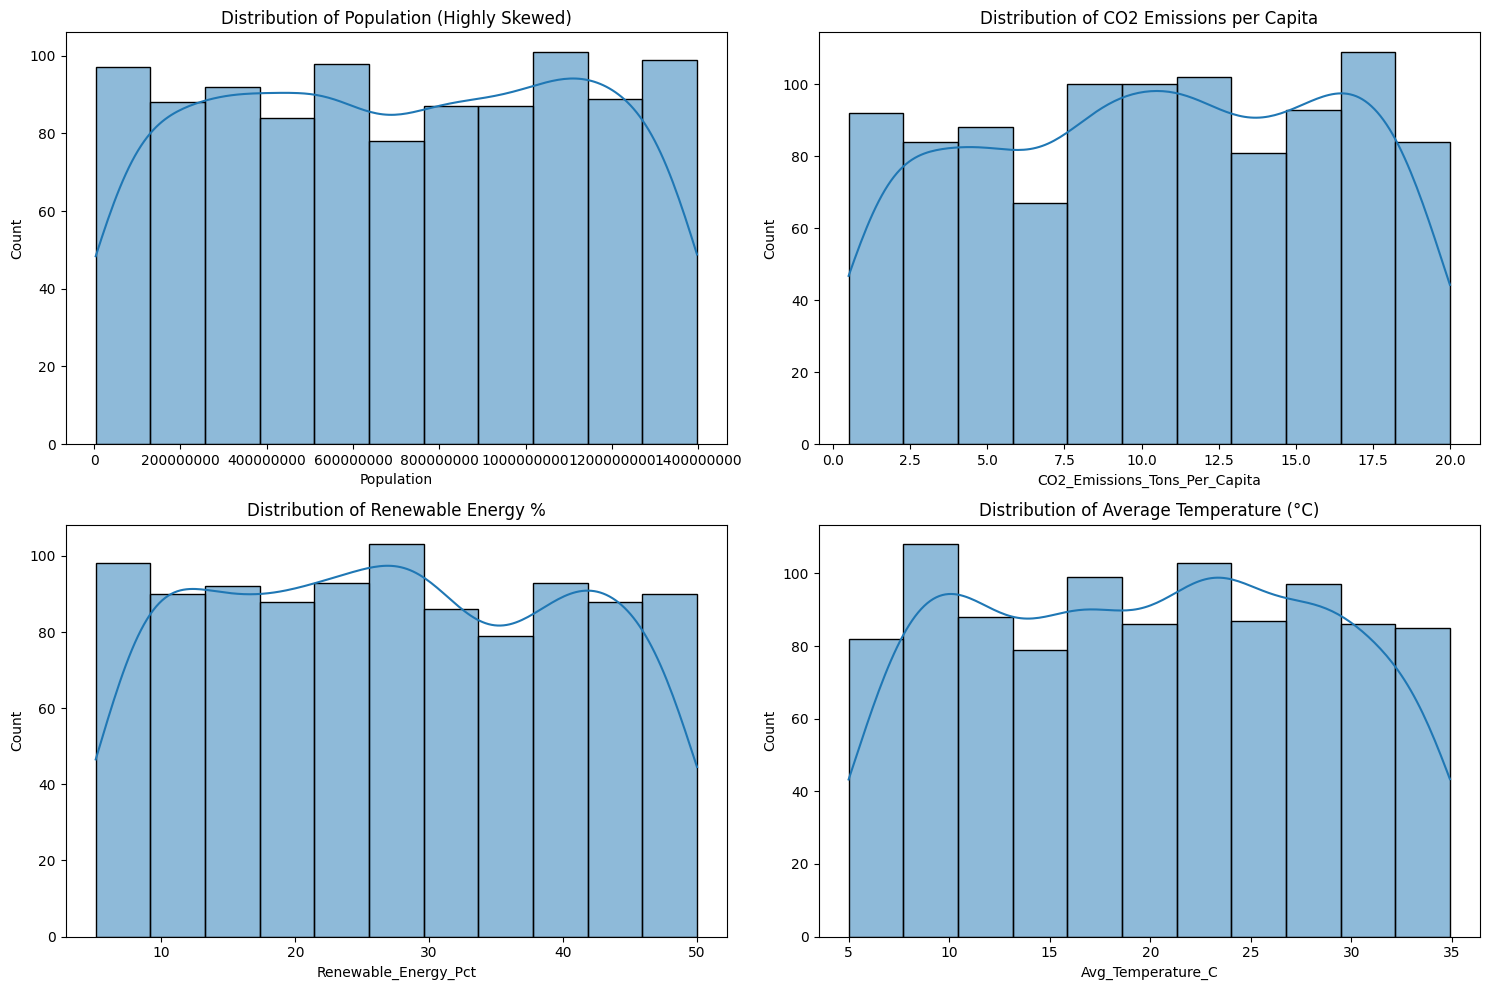

In [0]:

# Create subplots for distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Population (likely highly skewed)
sns.histplot(pdf["Population"], ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Distribution of Population (Highly Skewed)")
axes[0, 0].ticklabel_format(style='plain', axis='x') # Disable scientific notation

# Plot 2: CO2 Emissions per Capita
sns.histplot(pdf["CO2_Emissions_Tons_Per_Capita"], ax=axes[0, 1], kde=True)
axes[0, 1].set_title("Distribution of CO2 Emissions per Capita")

# Plot 3: Renewable Energy %
sns.histplot(pdf["Renewable_Energy_Pct"], ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Distribution of Renewable Energy %")

# Plot 4: Avg Temperature
sns.histplot(pdf["Avg_Temperature_C"], ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Distribution of Average Temperature (°C)")

plt.tight_layout()
plt.show()

###Feature Engineering: Creating Better Predictors
 To address skewness and multicollinearity, we will:
 1.  **Log-Transform Population:** This reduces the impact of extreme values and makes its distribution more normal, which is better suited for linear regression.
 2.  **Create an Interaction Term:** Perhaps the effect of renewable energy depends on a country's wealth. We'll create a new feature that interacts `Renewable_Energy_Pct` with `Avg_Temperature_C` (which can be a proxy for climate/geography)

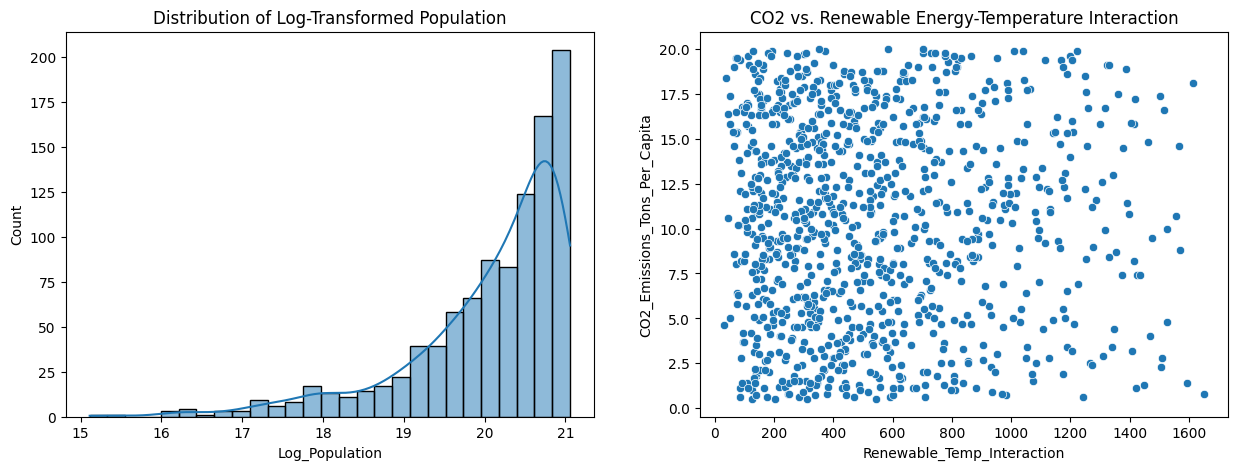

In [0]:
# Create a new DataFrame for modeling to avoid altering the original
model_df = pdf.copy()

# 1. Apply log transformation to Population to handle extreme skew
# Adding 1 to avoid log(0) for any hypothetical empty country
import numpy as np
model_df['Log_Population'] = np.log(model_df['Population'] + 1)

# 2. Create an interaction term
model_df['Renewable_Temp_Interaction'] = model_df['Renewable_Energy_Pct'] * model_df['Avg_Temperature_C']

# Display the new distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(model_df['Log_Population'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Log-Transformed Population')
sns.scatterplot(data=model_df, x='Renewable_Temp_Interaction', y='CO2_Emissions_Tons_Per_Capita', ax=axes[1])
axes[1].set_title('CO2 vs. Renewable Energy-Temperature Interaction')
plt.show()

###Final model with improved features

In [0]:

# Define predictors and response for the new model
X_refined = model_df[["Renewable_Energy_Pct", "Log_Population", "Forest_Area_Pct", "Avg_Temperature_C", "Renewable_Temp_Interaction"]]
y = model_df["CO2_Emissions_Tons_Per_Capita"]

# Add constant and fit the model
X_refined = sm.add_constant(X_refined)
refined_model = sm.OLS(y, X_refined).fit()

# Print the summary
print(refined_model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     CO2_Emissions_Tons_Per_Capita   R-squared:                       0.003
Model:                                       OLS   Adj. R-squared:                 -0.002
Method:                            Least Squares   F-statistic:                    0.6814
Date:                           Mon, 15 Sep 2025   Prob (F-statistic):              0.638
Time:                                   09:33:01   Log-Likelihood:                -3142.1
No. Observations:                           1000   AIC:                             6296.
Df Residuals:                                994   BIC:                             6326.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

# Climate Change CO2 Emissions Analysis

## Objective
Investigate the drivers of per-capita CO2 emissions using global climate and environmental indicators.  
Demonstrate statistical rigor, hypothesis testing, feature engineering, and iterative modeling.

---

## Workflow

### 1. Data Loading & Cleaning
- Loaded dataset from Delta table `climate_change_dataset`.
- Standardized column names, handled missing values, ensured correct data types, removed duplicates.

### 2. Exploratory Data Analysis
- Visualized distributions for:
  - Population
  - CO2 Emissions per Capita
  - Renewable Energy %
  - Average Temperature
- Created scatter plots and boxplots:
  - CO2 emissions vs Renewable Energy adoption
  - CO2 emissions for high vs low renewable countries
- Identified skew in Population and the need for feature transformation.

### 3. Hypothesis Testing
- Tested whether countries with high renewable energy adoption have lower CO2 emissions per capita.
- **Levene's Test:** Variances were equal (p = 0.8412).  
- **Independent Samples t-test:** No significant difference in CO2 emissions between high and low renewable countries (t = 1.6211, p = 0.1053).  
- Interpretation: The visual trends observed in EDA are supported statistically — renewable energy adoption alone does not significantly explain differences in per-capita CO2 emissions.

### 4. Regression Analysis
- **Single-factor regression**: CO2 Emissions ~ Renewable_Energy_Pct (R² ≈ 0.001)
- **Multi-factor regression**: CO2 Emissions ~ Renewable_Energy_Pct + Population + Forest Area + Extreme Weather + Avg Temperature (R² ≈ 0.002)
- Initial models indicated low predictive power and high numeric instability due to skewed Population values.

### 5. Feature Engineering & Diagnostics
- Log-transformed Population to reduce skew and stabilize computations.
- Created interaction term: Renewable_Energy_Pct × Avg_Temperature_C.
- Correlation matrix analysis confirmed no strong multicollinearity.
- Refined regression (R² ≈ 0.003) improved numeric stability but predictors remained statistically insignificant.

### 6. Interpretation & Business Insight
- Low R² indicates that per-capita CO2 emissions are influenced by factors not captured in this dataset (e.g., industrial activity, transportation, economic structure).
- Statistical rigor and feature engineering demonstrate:
  - Diagnosis of model issues
  - Iterative improvement and careful data handling
  - Transparency in communicating results
- Recommendation for stakeholders: enrich the dataset with additional predictors for improved insights and more actionable conclusions.

---

## Key Takeaway
Even when predictive power is limited, rigorous statistical analysis—including hypothesis testing, feature engineering, and diagnostic evaluation—turns an initially “failed” experiment into a compelling narrative of data science rigor and thoughtful insight.

